In [3]:
from modules.timing import get_timing
from modules.helpers import generate_random_float_list, generate_random_int_list
import matplotlib.pyplot as plt

## Quick sort

Hieronder staat een recursieve implementatie van het quick sorting algoritme. De iteratieve versie van quicksort is veel schrijfwerk en erg lastig te lezen en te begrijpen.

Quick sorting algoritme is gebaseerd op het idee van 'divide and conquer'. Er wordt gewerkt met een zogenaamde pivot. Deze pivot is altijd het element in de (sub)lijst zodanig dat alle elementen aan de linker kant kleiner zijn dan deze pivot. Daarom is de eerst pivot altijd het eerste element van de (sub)lijst.

Als de eerste pivot gekozen is, wordt er door de lijst heen gelopen en wordt alle lagere, gelijke en hogere getallen dan de pivot opgeslagen in lijsten. De lijsten met hogere en lagere elementen worden opnieuw gesorteerd met hetzelfde proces. Aangezien er geen hogere of lagere getallen dan gelijke getallen zijn, hoeven de gelijk getallen niet gesorteerd te worden, maar alleen op de juiste plek bewaard te worden. Dit proces van splitsen van lagere, gelijke en hogere getallen wordt herhaald tot de lagere, gelijke en hogere getallenlijsten niet meer dan 1 element bevatten. Al deze kleine lijsten worden samengevoegd tot de gesorteerde lijst.

Er zijn ook andere implementaties waarbij er geen lijsten van lagere, gelijke en hogere getallen bijgehouden wordt, maar items worden gewisseld. Ik vond deze implementatie het best te begrijpen, zowel qua code als algoritmiek.

In [4]:
def quick_sort(data):
    
    n = len(data)
    smaller, equal, bigger = [], [], []

    # list is already sorted
    if n < 2:
        return data
    
    # pivot is always the first element of the (sub) array
    pivot = data[0]
    
    # loop over list
    for i in range(n):
        
        if data[i] < pivot:
            smaller.append(data[i])
            
        elif data[i] == pivot:
            equal.append(data[i])
            
        else:
            bigger.append(data[i])

    return quick_sort(smaller) + equal + quick_sort(bigger)

### Big O

De gemiddelde en beste tijdscomplexiteit van bucket sort is O(n log(n)) waar n voor lijst grootte staat. De runtime van dit algoritme is over het algemeen erg snel omdat er gewerkt wordt met lijsten en lijstindexen, en er een enkele for loop gebruikt wordt. Dit algoritme gebruikt erg weinig geheugen omdat bij elke stap een stukje resultaat al wordt opgeslagen en de dimensie van lijsten steeds afneemt.

Dit runtime is afhankelijk van het aantal gevulde buckets, en het aantal items per bucket.

De slechtse tijdscomplexiteit die dit algoritme kan hebben is O(n^2), een kwadratisch verloop. Dit komt voor als de gekozen pivot steeds het hoogste of laagste element van de lijst is, en het aantal functie aanroepen flink toeneemt. 

Hieronder is te zien dat in de meeste gevallen waar de complexiteit niet O(n^2) is, het tijdverloop linear is.

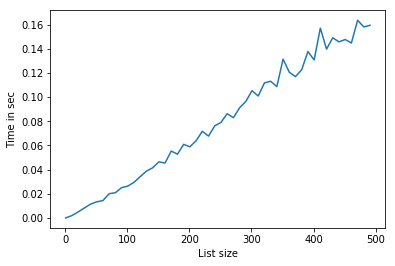

In [5]:
# print and plot timings
tests = [generate_random_float_list(i) for i in range(1, 500, 10)]
timings = get_timing(function=quick_sort, parameters=tests, repeat=100)
plt.plot(list(timings[1].keys()), list(timings[1].values()))
plt.xlabel("List size")
plt.ylabel("Time in sec")
plt.show()